In [1]:
import torch.optim as optim
from torch.utils.data import DataLoader,ConcatDataset
from torchvision.datasets import ImageFolder
from torchvision import models
from torchvision.models.alexnet import AlexNet_Weights

In [2]:
#Adjust according to your path
import sys
sys.path.append('/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/functions') #Adjust according to your path

from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

In [3]:
%%capture 
#Run if you don't already have the dataset
"""
!git clone https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa.git
"""

In [4]:
#Adjust according to your path
train_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/train"
test_path = "/orfeo/cephfs/home/dssc/acesa000/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/test"

In [5]:
device = get_default_device()

In [6]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()


In [7]:
train=ImageFolder(root=train_path,transform=transformation_for_AlexNet)
test=ImageFolder(root=test_path,transform=transformation_for_AlexNet)

In [8]:
#split training set into training and validation
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

In [9]:
batch_size = 32

augmented_training_set=TransformedDataSet(training_set)
concatenated_dataset = torch.utils.data.ConcatDataset([training_set, augmented_training_set])
augmented_train_loader = DataLoader(concatenated_dataset, batch_size=batch_size,shuffle=True,pin_memory=True)

validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

augmented_train_loader = DeviceDataLoader(augmented_train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [10]:
model=models.alexnet(weights=AlexNet_Weights.DEFAULT)

weights=AlexNet_Weights.DEFAULT

In [11]:
for param in model.parameters():
    param.requires_grad = False

In [12]:
model.classifier[6]=nn.Linear(model.classifier[6].in_features,15)
for param in model.classifier[6].parameters():
    param.requires_grad=True

In [13]:
model.to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.00001,momentum=0.9,weight_decay= 0.0005)
#optimizer=optim.Adam(model.parameters(),lr=0.00001)

EPOCH1:
LOSS train: 2.711831197142601 validation: 2.559687614440918 | validation_accuracy: 12.444444444444445% 
EPOCH2:
LOSS train: 2.435852673649788 validation: 2.3197412490844727 | validation_accuracy: 27.11111111111111% 
EPOCH3:
LOSS train: 2.230344620347023 validation: 2.1351540088653564 | validation_accuracy: 40.0% 
EPOCH4:
LOSS train: 2.0563090428709985 validation: 1.983249545097351 | validation_accuracy: 47.55555555555556% 
EPOCH5:
LOSS train: 1.9164704218506814 validation: 1.8533881902694702 | validation_accuracy: 53.77777777777778% 
EPOCH6:
LOSS train: 1.7933023184537888 validation: 1.7412827014923096 | validation_accuracy: 59.111111111111114% 
EPOCH7:
LOSS train: 1.6909023493528366 validation: 1.6473134756088257 | validation_accuracy: 62.666666666666664% 
EPOCH8:
LOSS train: 1.5937427565455438 validation: 1.5627686977386475 | validation_accuracy: 65.77777777777777% 
EPOCH9:
LOSS train: 1.5132811337709426 validation: 1.4913333654403687 | validation_accuracy: 67.11111111111111%

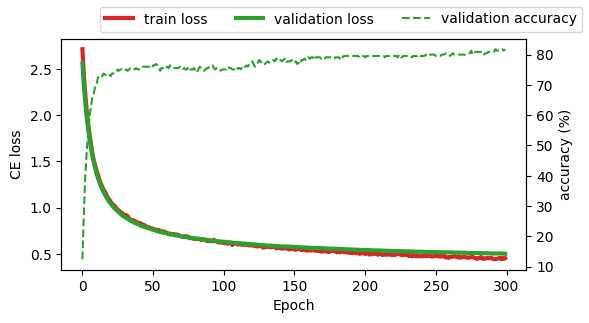

In [14]:
model_path=train_model(model,augmented_train_loader,validation_loader,loss_function,optimizer,300,device)

Accuracy of the network on the test images: 82.17755443886097%


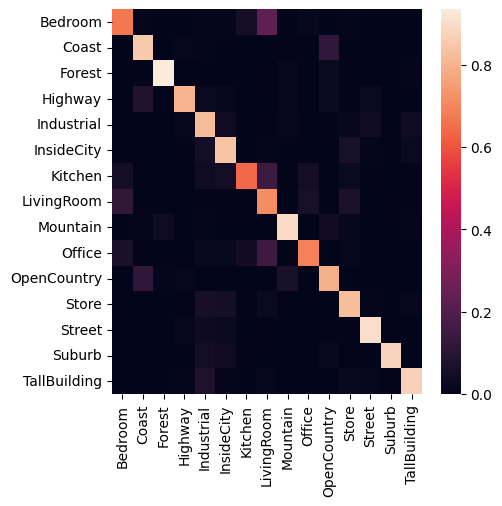

In [15]:
test_model(model,model_path,test_loader,test,device)

In [16]:
!rm model*